In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("DoctorFee_Final_Train.csv")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#checking Shape
df.shape

(5961, 7)

In [4]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#checking columns
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
#checking Null Value in Columns
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
#checking any null value
df.isnull().values.any()

True

In [9]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [10]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [11]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

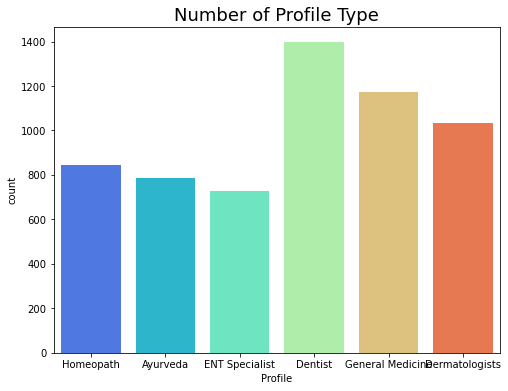

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [12]:
plt.subplots(figsize=(8,6))
sns.countplot(x='Profile',data=df,palette='rainbow')
plt.title('Number of Profile Type',fontsize=18)
plt.show()

print(df['Profile'].value_counts())

In [13]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [14]:
df[['Qual1','Qual2']] =df['Qualification'].str.split(", ",n=1,expand=True).rename(columns={0:"Qual1",1:"Qual2"})

In [15]:
df

,Qualification,Experience,Rating,Place,Profile,Fees,Qual1,Qual2
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD - Homeopathy
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD - Ayurveda Medicine
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS - Otorhinolaryngology
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc - Zoology,BAMS
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,BAMS,None
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300,MBBS,MS - ENT
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100,MBBS,None
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600,MBBS,None
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100,MBBS,MD - General Medicine


In [16]:
df.drop('Qualification',axis=1,inplace=True)

In [17]:
df.head()

,Experience,Rating,Place,Profile,Fees,Qual1,Qual2
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD - Homeopathy
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD - Ayurveda Medicine
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS - Otorhinolaryngology
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc - Zoology,BAMS
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,BAMS,None


In [18]:
df[['Street','City']] =df['Place'].str.split(", ",n=1,expand=True).rename(columns={0:"Street",1:"City"})

In [19]:
df

,Experience,Rating,Place,Profile,Fees,Qual1,Qual2,Street,City
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,BAMS,None,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...
5956,19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300,MBBS,MS - ENT,Basavanagudi,Bangalore
5957,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100,MBBS,None,Nungambakkam,Chennai
5958,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600,MBBS,None,Greater Kailash Part 2,Delhi
5959,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100,MBBS,MD - General Medicine,Vileparle West,Mumbai


In [20]:
df.drop('Place',axis=1,inplace=True)

In [21]:
df.head()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,24 years experience,100%,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12 years experience,98%,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9 years experience,NaN,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12 years experience,NaN,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20 years experience,100%,Ayurveda,250,BAMS,None,Keelkattalai,Chennai


In [22]:
df

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,24 years experience,100%,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12 years experience,98%,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9 years experience,NaN,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12 years experience,NaN,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20 years experience,100%,Ayurveda,250,BAMS,None,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,19 years experience,98%,ENT Specialist,300,MBBS,MS - ENT,Basavanagudi,Bangalore
5957,33 years experience,NaN,General Medicine,100,MBBS,None,Nungambakkam,Chennai
5958,41 years experience,97%,General Medicine,600,MBBS,None,Greater Kailash Part 2,Delhi
5959,15 years experience,90%,General Medicine,100,MBBS,MD - General Medicine,Vileparle West,Mumbai


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
df['Experience']=le.fit_transform(df['Experience'])
df.head()


,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100%,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,3,98%,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,63,NaN,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,3,NaN,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,12,100%,Ayurveda,250,BAMS,None,Keelkattalai,Chennai


In [25]:
le=LabelEncoder()
df['Profile']=le.fit_transform(df['Profile'])
df.head()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100%,5,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,3,98%,0,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,63,NaN,3,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,3,NaN,0,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,12,100%,0,250,BAMS,None,Keelkattalai,Chennai


In [26]:
le=LabelEncoder()
df['Qual1']=le.fit_transform(df['Qual1'])
df.head()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100%,5,100,8,MD - Homeopathy,Kakkanad,Ernakulam
1,3,98%,0,350,5,MD - Ayurveda Medicine,Whitefield,Bangalore
2,63,NaN,3,300,79,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,3,NaN,0,250,12,BAMS,Bannerghatta Road,Bangalore
4,12,100%,0,250,5,None,Keelkattalai,Chennai


In [27]:
df['Qual2']=df['Qual2'].astype(str)

In [28]:
le=LabelEncoder()
df['Qual2']=le.fit_transform(df['Qual2'])


In [29]:
df['Street']=df['Street'].astype(str)

In [30]:
le=LabelEncoder()
df['Street']=le.fit_transform(df['Street'])


In [31]:
df['City']=df['City'].astype(str)

In [32]:
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [33]:
df.head()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100%,5,100,8,711,296,4
1,3,98%,0,350,5,570,855,0
2,63,NaN,3,300,79,1023,452,0
3,3,NaN,0,250,12,9,68,0
4,12,100%,0,250,5,1078,335,1


In [34]:
df_new=df.replace(['%'],[''],regex=True)

In [35]:
df_new

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100,5,100,8,711,296,4
1,3,98,0,350,5,570,855,0
2,63,NaN,3,300,79,1023,452,0
3,3,NaN,0,250,12,9,68,0
4,12,100,0,250,5,1078,335,1
...,...,...,...,...,...,...,...,...
5956,10,98,3,300,79,961,70,0
5957,26,NaN,4,100,79,1078,535,1
5958,35,97,4,600,79,1078,215,3
5959,6,90,4,100,79,655,840,6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Experience  5961 non-null   int32 
 1   Rating      2659 non-null   object
 2   Profile     5961 non-null   int32 
 3   Fees        5961 non-null   int64 
 4   Qual1       5961 non-null   int32 
 5   Qual2       5961 non-null   int32 
 6   Street      5961 non-null   int32 
 7   City        5961 non-null   int32 
dtypes: int32(6), int64(1), object(1)
memory usage: 233.0+ KB


In [37]:
df_new.isnull().sum()

Experience       0
Rating        3302
Profile          0
Fees             0
Qual1            0
Qual2            0
Street           0
City             0
dtype: int64

In [38]:
df_new['Rating']=df_new['Rating'].replace(np.NaN,0)

In [39]:
df_new

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100,5,100,8,711,296,4
1,3,98,0,350,5,570,855,0
2,63,0,3,300,79,1023,452,0
3,3,0,0,250,12,9,68,0
4,12,100,0,250,5,1078,335,1
...,...,...,...,...,...,...,...,...
5956,10,98,3,300,79,961,70,0
5957,26,0,4,100,79,1078,535,1
5958,35,97,4,600,79,1078,215,3
5959,6,90,4,100,79,655,840,6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Experience  5961 non-null   int32 
 1   Rating      2659 non-null   object
 2   Profile     5961 non-null   int32 
 3   Fees        5961 non-null   int64 
 4   Qual1       5961 non-null   int32 
 5   Qual2       5961 non-null   int32 
 6   Street      5961 non-null   int32 
 7   City        5961 non-null   int32 
dtypes: int32(6), int64(1), object(1)
memory usage: 233.0+ KB


In [41]:
df_new['Rating']=df_new['Rating'].astype(int)

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  5961 non-null   int32
 1   Rating      5961 non-null   int32
 2   Profile     5961 non-null   int32
 3   Fees        5961 non-null   int64
 4   Qual1       5961 non-null   int32
 5   Qual2       5961 non-null   int32
 6   Street      5961 non-null   int32
 7   City        5961 non-null   int32
dtypes: int32(7), int64(1)
memory usage: 209.7 KB


In [43]:
df_new['Rating']=df_new['Rating'].replace(0,np.NaN)

In [44]:
df_new['Rating']=df_new['Rating'].fillna(df_new['Rating'].mean())

In [45]:
df_new

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100.000000,5,100,8,711,296,4
1,3,98.000000,0,350,5,570,855,0
2,63,94.643475,3,300,79,1023,452,0
3,3,94.643475,0,250,12,9,68,0
4,12,100.000000,0,250,5,1078,335,1
...,...,...,...,...,...,...,...,...
5956,10,98.000000,3,300,79,961,70,0
5957,26,94.643475,4,100,79,1078,535,1
5958,35,97.000000,4,600,79,1078,215,3
5959,6,90.000000,4,100,79,655,840,6


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  5961 non-null   int32  
 1   Rating      5961 non-null   float64
 2   Profile     5961 non-null   int32  
 3   Fees        5961 non-null   int64  
 4   Qual1       5961 non-null   int32  
 5   Qual2       5961 non-null   int32  
 6   Street      5961 non-null   int32  
 7   City        5961 non-null   int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 233.0 KB


# Summary Statistics

In [47]:
df_new.describe()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,23.010904,94.643475,2.441872,307.944640,47.961248,758.811777,412.804395,3.117430
std,20.937163,5.244204,1.658014,190.920373,39.370640,347.586458,256.586353,2.394688
min,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,94.643475,1.000000,150.000000,6.000000,523.000000,195.000000,1.000000
50%,15.000000,94.643475,2.000000,300.000000,79.000000,861.000000,409.000000,3.000000
75%,36.000000,96.000000,4.000000,500.000000,79.000000,1078.000000,626.000000,5.000000
max,63.000000,100.000000,5.000000,950.000000,150.000000,1197.000000,866.000000,10.000000


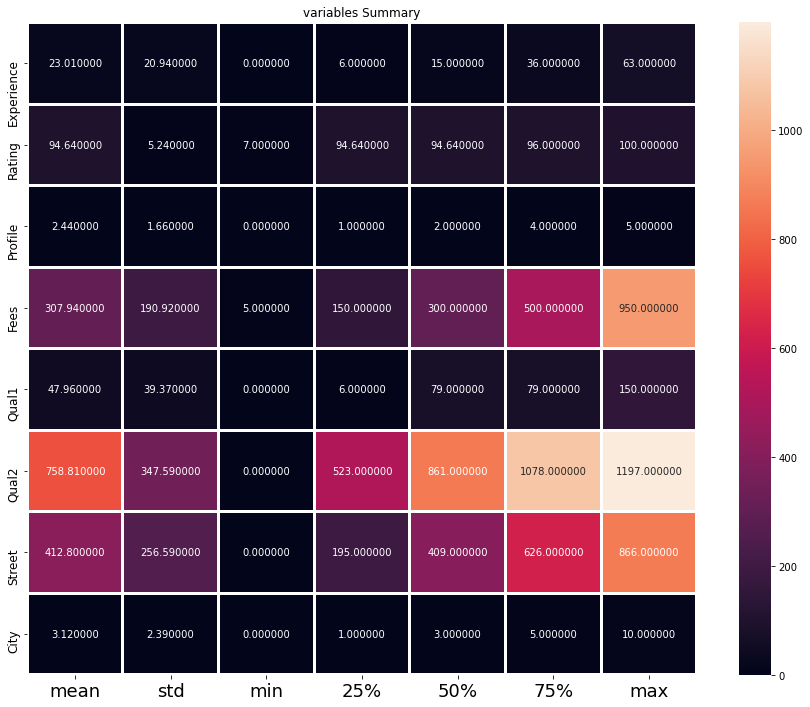

In [48]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df_new.describe()[1:].transpose(),2), linewidth=2, annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables Summary")
plt.show()


# To check the Correlation

In [49]:
df_new.corr()

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
Experience,1.000000,0.024575,-0.032711,-0.048529,0.006901,0.026434,-0.009692,0.026037
Rating,0.024575,1.000000,-0.111018,-0.090106,-0.183467,0.041605,0.015567,0.025034
Profile,-0.032711,-0.111018,1.000000,0.145226,0.307995,0.005270,0.016637,-0.020255
Fees,-0.048529,-0.090106,0.145226,1.000000,0.233299,-0.159302,-0.063746,-0.047417
Qual1,0.006901,-0.183467,0.307995,0.233299,1.000000,-0.413366,0.005997,-0.025271
Qual2,0.026434,0.041605,0.005270,-0.159302,-0.413366,1.000000,0.022705,0.033156
Street,-0.009692,0.015567,0.016637,-0.063746,0.005997,0.022705,1.000000,-0.058039
City,0.026037,0.025034,-0.020255,-0.047417,-0.025271,0.033156,-0.058039,1.000000


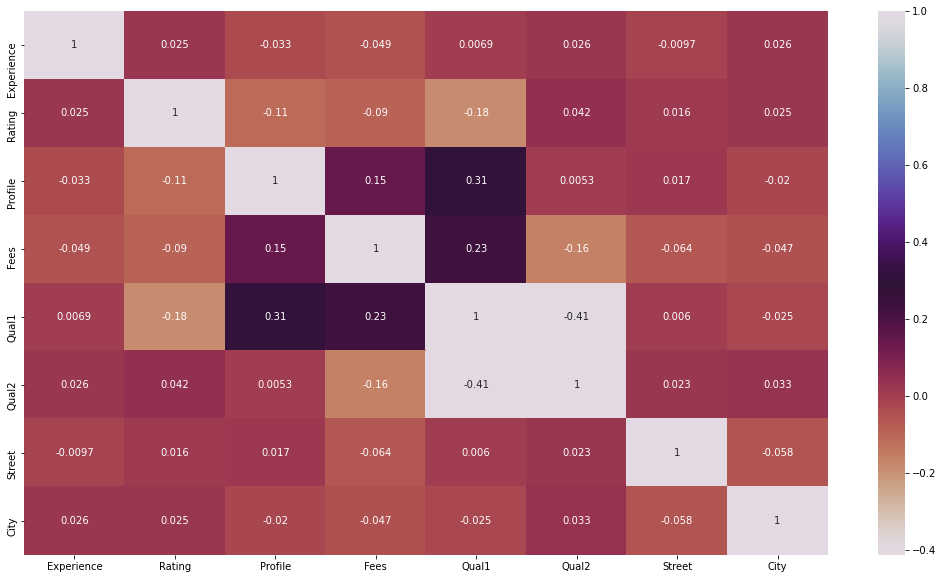

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot=True,cmap='twilight_r')

Text(0.5, 1.0, 'Correlation with Target Variable')

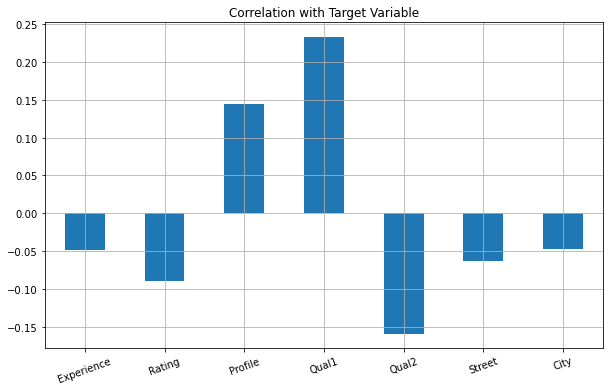

In [51]:
#checking the correlation with target Variable
plt.figure(figsize=(10,6))
df_new.drop('Fees',axis=1).corrwith(df_new['Fees']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with Target Variable")

# Data Visulization

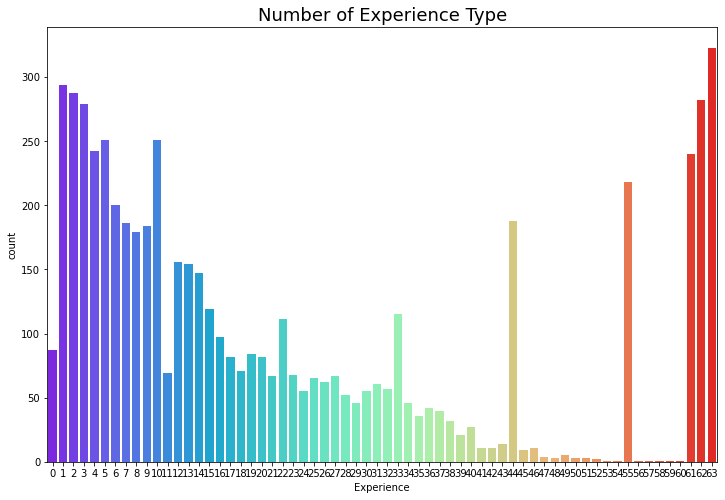

63    323
1     294
2     288
62    282
3     279
     ... 
59      1
54      1
58      1
53      1
57      1
Name: Experience, Length: 64, dtype: int64


In [52]:
plt.subplots(figsize=(12,8))
sns.countplot(x='Experience',data=df_new,palette='rainbow')
plt.title('Number of Experience Type',fontsize=18)
plt.show()

print(df['Experience'].value_counts())

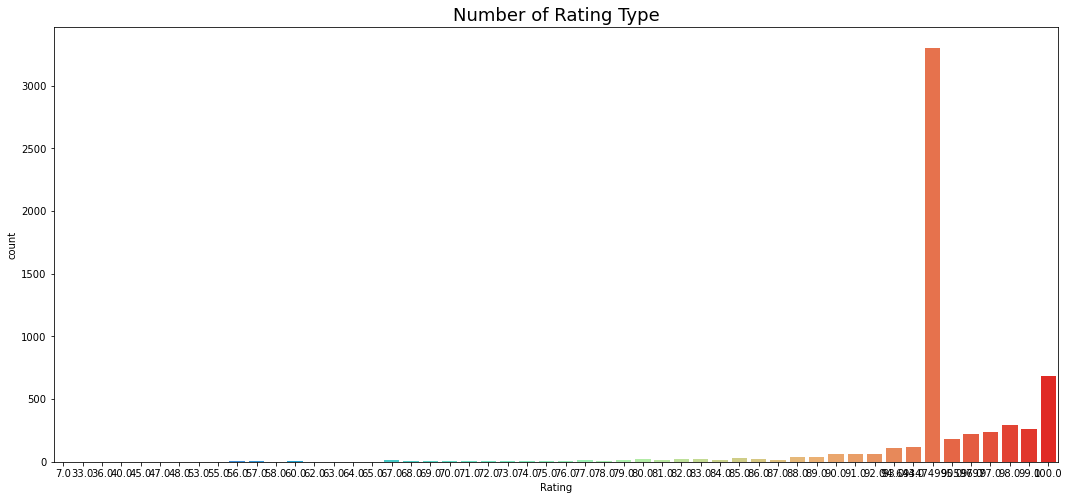

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
84%      13
79%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
60%       7
74%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
33%       2
64%       2
63%       2
55%       2
62%       2
48%       1
65%       1
53%       1
40%       1
36%       1
58%       1
47%       1
45%       1
7%        1
Name: Rating, dtype: int64


In [53]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Rating',data=df_new,palette='rainbow')
plt.title('Number of Rating Type',fontsize=18)
plt.show()

print(df['Rating'].value_counts())

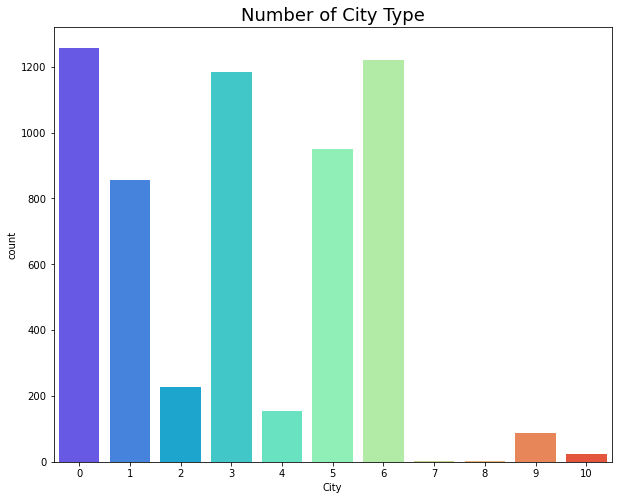

0     1258
6     1219
3     1184
5      951
1      855
2      228
4      153
9       86
10      25
7        1
8        1
Name: City, dtype: int64


In [54]:
plt.subplots(figsize=(10,8))
sns.countplot(x='City',data=df_new,palette='rainbow')
plt.title('Number of City Type',fontsize=18)
plt.show()

print(df['City'].value_counts())

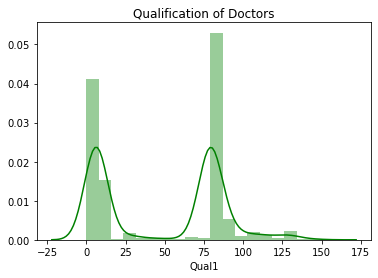

In [55]:
sns.distplot(df_new['Qual1'], color='g')
plt.title("Qualification of Doctors")
plt.show()

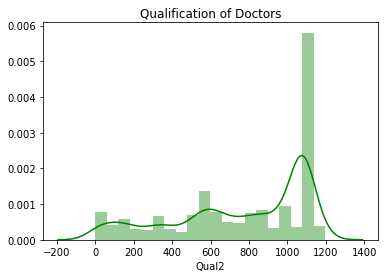

In [56]:
sns.distplot(df_new['Qual2'], color='g')
plt.title("Qualification of Doctors")
plt.show()

In [57]:
df_new.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Qual1', 'Qual2', 'Street',
       'City'],
      dtype='object')

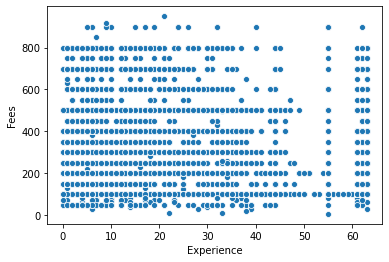

In [58]:
sns.scatterplot(x="Experience" ,y="Fees",data=df_new)

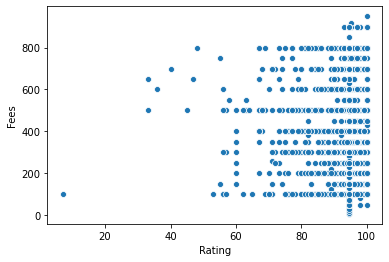

In [59]:
sns.scatterplot(x="Rating" ,y="Fees",data=df_new)

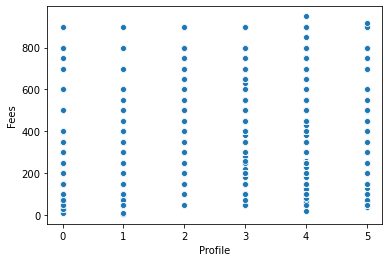

In [60]:
sns.scatterplot(x="Profile" ,y="Fees",data=df_new)

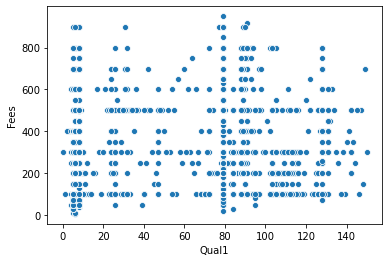

In [61]:
sns.scatterplot(x="Qual1" ,y="Fees",data=df_new)

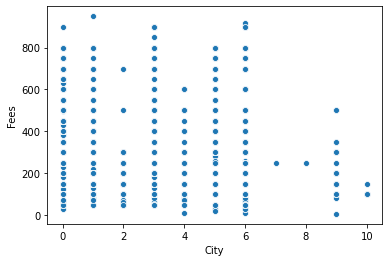

In [62]:
sns.scatterplot(x="City" ,y="Fees",data=df_new)

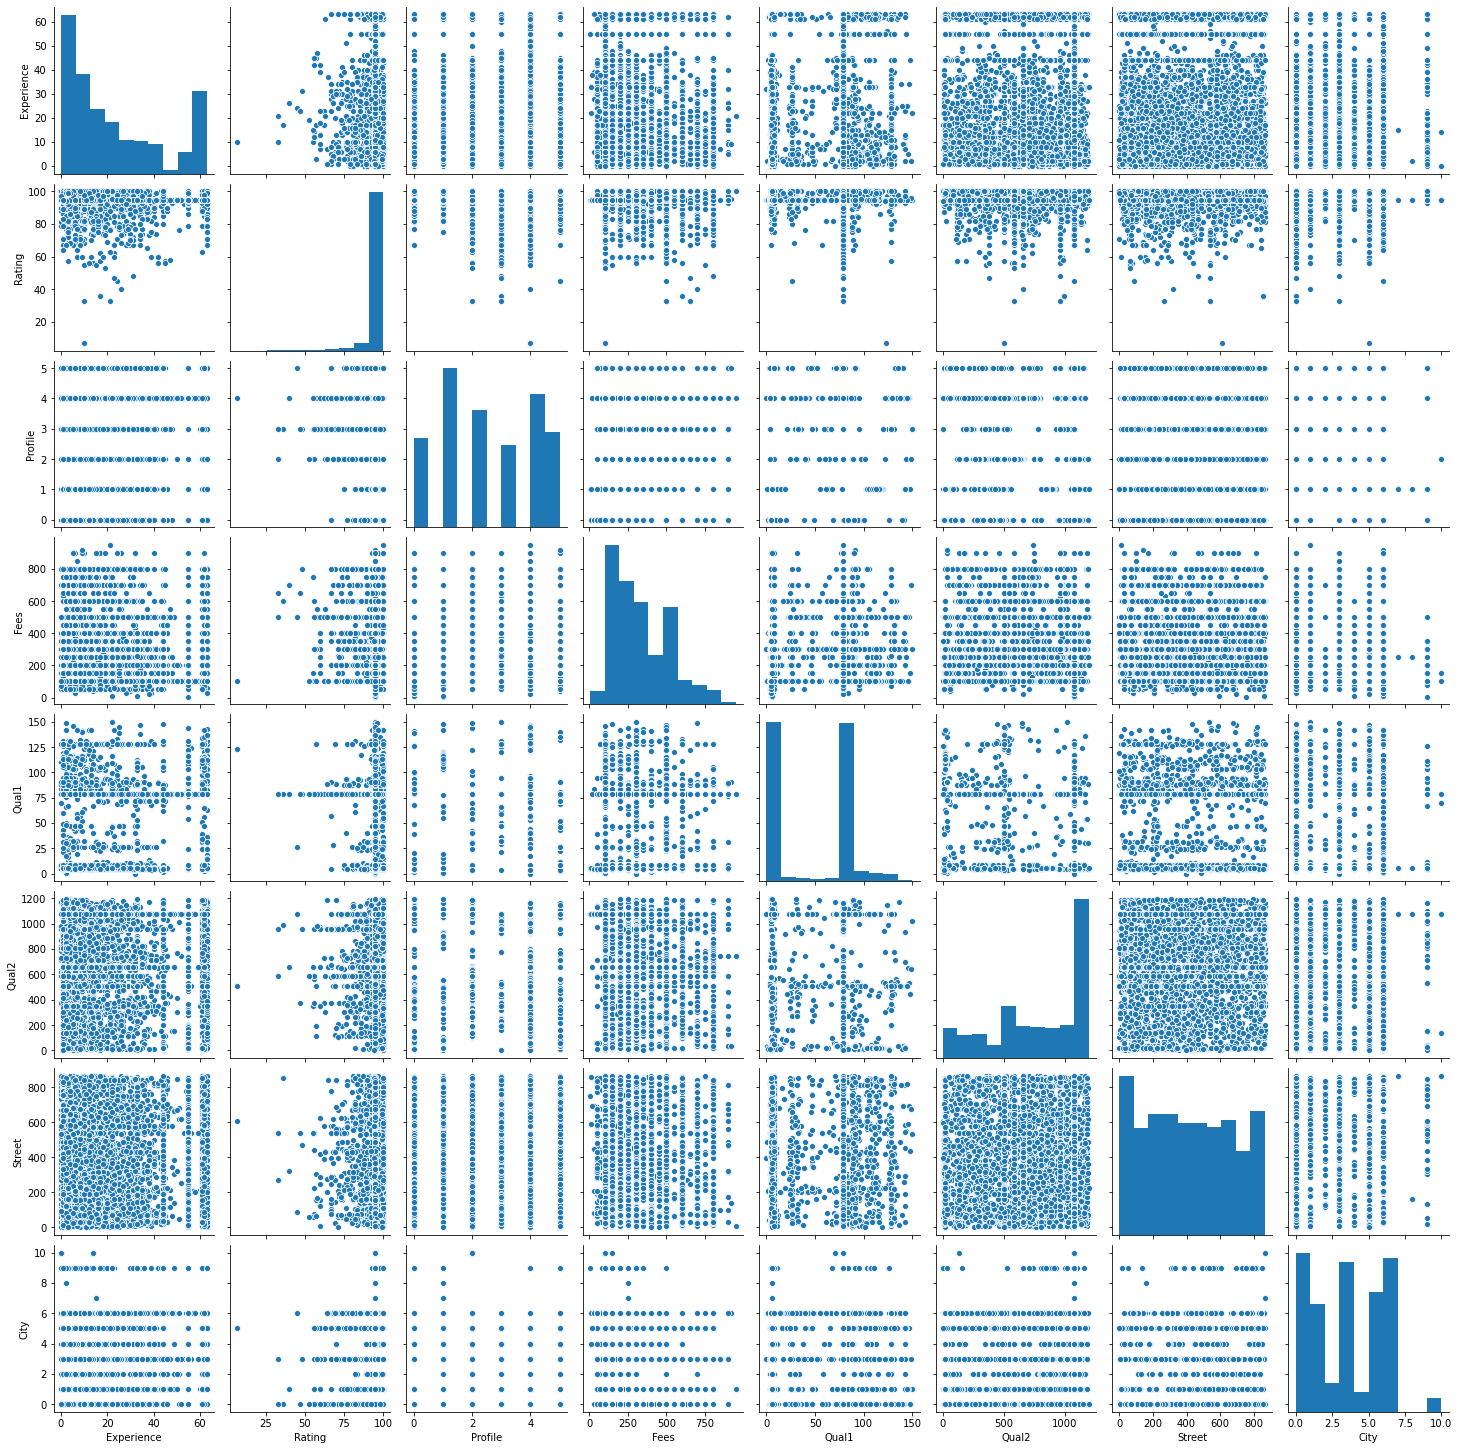

In [63]:
sns.pairplot(df_new)

# checking Outliers and Skewness

In [64]:
df.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Qual1', 'Qual2', 'Street',
       'City'],
      dtype='object')

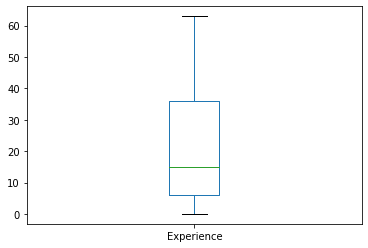

In [65]:
df_new['Experience'].plot.box()

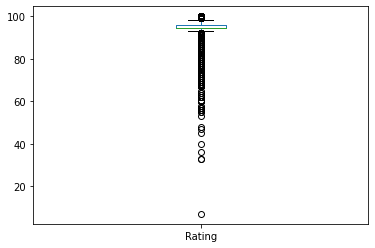

In [66]:
df_new['Rating'].plot.box()

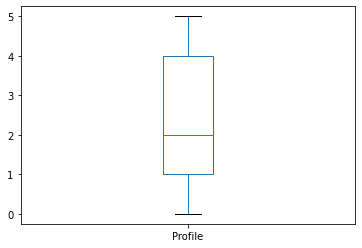

In [67]:
df_new['Profile'].plot.box()

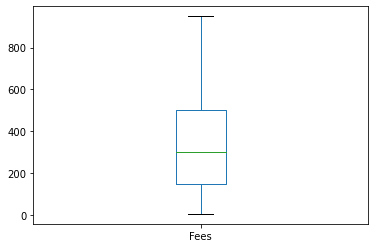

In [68]:
df_new['Fees'].plot.box()

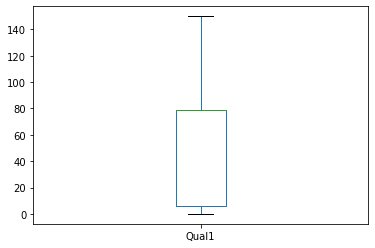

In [69]:
df_new['Qual1'].plot.box()

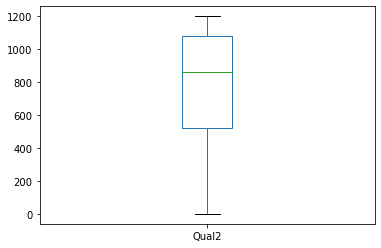

In [70]:
df_new['Qual2'].plot.box()

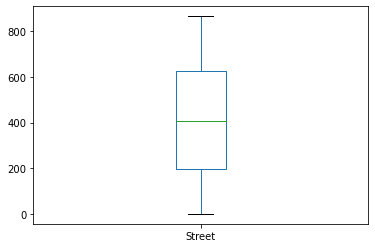

In [71]:
df_new['Street'].plot.box()

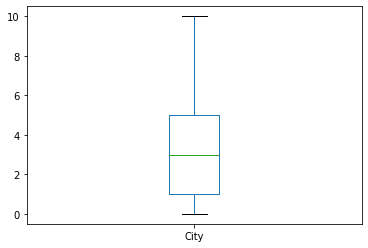

In [72]:
df_new['City'].plot.box()

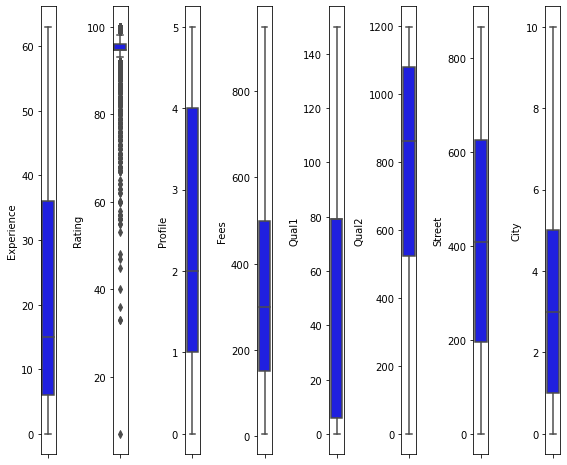

In [73]:
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

only Rating Column outlier is Present rest are ok.

In [74]:
df_new.skew()

Experience    0.823531
Rating       -4.906222
Profile       0.108803
Fees          0.751870
Qual1         0.068267
Qual2        -0.714112
Street        0.112887
City          0.182477
dtype: float64

only rating Column Skewness Present rest all are free from skewness.

# Removeing Outliers and Skewness

In [75]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
threshold=3
print(np.where(z>3))
z

(array([  55,   67,  140,  178,  209,  275,  293,  309,  333,  377,  458,
        465,  585,  590,  632,  692,  731,  787,  788,  815,  911,  918,
        968,  979,  987,  990,  998, 1018, 1170, 1240, 1303, 1314, 1392,
       1425, 1433, 1444, 1475, 1594, 1614, 1631, 1648, 1717, 1741, 1747,
       1778, 1796, 1852, 1877, 2089, 2161, 2165, 2252, 2277, 2309, 2323,
       2391, 2393, 2428, 2478, 2500, 2522, 2548, 2585, 2623, 2646, 2670,
       2708, 2715, 2726, 2738, 2758, 2829, 2833, 2962, 2991, 3093, 3120,
       3126, 3144, 3222, 3254, 3270, 3333, 3365, 3367, 3463, 3526, 3537,
       3593, 3604, 3615, 3627, 3661, 3676, 3766, 3783, 3820, 3861, 4040,
       4055, 4058, 4135, 4174, 4212, 4219, 4459, 4474, 4478, 4509, 4581,
       4608, 4609, 4612, 4730, 4808, 4825, 4835, 4843, 4851, 4880, 4971,
       5028, 5127, 5195, 5244, 5249, 5250, 5262, 5298, 5311, 5316, 5351,
       5422, 5461, 5502, 5523, 5531, 5612, 5615, 5636, 5647, 5663, 5840,
       5862, 5892], dtype=int64), array([1, 1, 1, 

array([[3.34882629e-01, 1.02150372e+00, 1.54301587e+00, ...,
        1.37565162e-01, 4.55262692e-01, 3.68584183e-01],
       [9.55840219e-01, 6.40098345e-01, 1.47289258e+00, ...,
        5.43253660e-01, 1.72352385e+00, 1.30191976e+00],
       [1.91011789e+00, 2.71004821e-15, 3.36652489e-01, ...,
        7.60128536e-01, 1.52770763e-01, 1.30191976e+00],
       ...,
       [5.72670771e-01, 4.49395656e-01, 9.39834180e-01, ...,
        9.18375823e-01, 7.70972370e-01, 4.90418035e-02],
       [8.12542314e-01, 8.85523167e-01, 9.39834180e-01, ...,
        2.98689672e-01, 1.66505910e+00, 1.20383616e+00],
       [7.17010377e-01, 1.02150372e+00, 8.69710893e-01, ...,
        2.50859996e-01, 7.17930063e-01, 4.90418035e-02]])

In [76]:
df1=df_new[(z<3).all(axis=1)]

In [77]:
df1

,Experience,Rating,Profile,Fees,Qual1,Qual2,Street,City
0,16,100.000000,5,100,8,711,296,4
1,3,98.000000,0,350,5,570,855,0
2,63,94.643475,3,300,79,1023,452,0
3,3,94.643475,0,250,12,9,68,0
4,12,100.000000,0,250,5,1078,335,1
...,...,...,...,...,...,...,...,...
5956,10,98.000000,3,300,79,961,70,0
5957,26,94.643475,4,100,79,1078,535,1
5958,35,97.000000,4,600,79,1078,215,3
5959,6,90.000000,4,100,79,655,840,6


In [78]:
df_new.shape

(5961, 8)

In [79]:
#Percentage loss of Data after removing outliers
percentage_loss=((5961-5816)/5961)*100
print(percentage_loss)

2.432477772185875


# Model Traning


In [80]:
x=df1.drop(columns=['Fees'],axis=1)

In [81]:
x.head()

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,16,100.000000,5,8,711,296,4
1,3,98.000000,0,5,570,855,0
2,63,94.643475,3,79,1023,452,0
3,3,94.643475,0,12,9,68,0
4,12,100.000000,0,5,1078,335,1


In [82]:
y=df1['Fees']


In [83]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [84]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')


In [85]:
df1.skew()

Experience    0.818915
Rating       -1.535301
Profile       0.127449
Fees          0.725228
Qual1         0.106053
Qual2        -0.729443
Street        0.108747
City          0.183971
dtype: float64

In [86]:
# Scaling in input Variables

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [87]:
# Splitting the data into tranning and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [88]:
    #checking the shape
    print(x_train.shape, '\t\t',x_test.shape)

(4652, 7) 		 (1164, 7)


In [89]:
print(y_train.shape,'\t', y_test.shape)

(4652,) 	 (1164,)


In [90]:
# importing all models Liberary
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# importing all Boosting Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing Cross val Score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [91]:
lr=LinearRegression()
parameters ={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('lr')
print('*************************************')
print('\n')

ls=Lasso()
parameters ={'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(1,10))}
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ls')
print('*************************************')
print('\n')

rd=Ridge()
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[1e-3], 'random_state':list(range(0,10))}
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('rd')
print('*************************************')
print('\n')

en=ElasticNet()
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'l1_ratio' :[0.5]}
clf=GridSearchCV(en,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('en')
print('*************************************')
print('\n')

dt=DecisionTreeRegressor()
parameters ={'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('dt')
print('*************************************')
print('\n')

sv=SVR()
parameters= {'kernel':['linear','poly','rbf','sigmoid']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('sv')
print('*************************************')
print('\n')

sv=SVR()
parameters= {'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn=KNeighborsRegressor()
parameters= {'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('knn')
print('*************************************')
print('\n')



{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
lr
*************************************


{'alpha': 1, 'random_state': 1}
ls
*************************************


{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}
rd
*************************************


{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'normalize': False}
en
*************************************


{'criterion': 'mae', 'splitter': 'random'}
dt
*************************************


{'kernel': 'rbf'}
sv
*************************************


{'gamma': 'auto'}
*************************************


{'algorithm': 'auto', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
knn
*************************************




In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [93]:
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='mae', splitter='random'),KNeighborsRegressor(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='rbf', gamma='auto')]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of LinearRegression(normalize=True) is: 0.08095413986388378
Error
Mean Absolute Error: 144.24108426912798
Mean Square Error: 31597.929663945055
root mean squared Error: 177.75806497581215
r2_score: 0.07567404836188785
*********************************************************************************************


Score of Lasso(alpha=1, random_state=1) is: 0.08077547262893403
Error
Mean Absolute Error: 144.47701736912566
Mean Square Error: 31627.95220182156
root mean squared Error: 177.84249267771062
r2_score: 0.07479580693314758
*********************************************************************************************


Score of Ridge(alpha=0.1, normalize=True, random_state=0) is: 0.08058980948092953
Error
Mean Absolute Error: 144.47986764692624
Mean Square Error: 31590.553166185357
root mean squared Error: 177.73731506407245
r2_score: 0.07588983111677094
*********************************************************************************************


Score of ElasticNet(alpha=0

#cross validate the models

In [94]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='mae', splitter='random'),KNeighborsRegressor(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='rbf', gamma='auto')]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: LinearRegression(normalize=True) is:
score: [0.08566032 0.05697262 0.08937895]
mean score: 0.07733729691147928
Standard Deviation: 0.014479804910077715
***************************************************************************************


Score of: Lasso(alpha=1, random_state=1) is:
score: [0.08525749 0.05755911 0.08884933]
mean score: 0.07722197453581152
Standard Deviation: 0.013980854984124791
***************************************************************************************


Score of: Ridge(alpha=0.1, normalize=True, random_state=0) is:
score: [0.08491398 0.05789986 0.08898045]
mean score: 0.0772647610582476
Standard Deviation: 0.013793320637565845
***************************************************************************************


Score of: ElasticNet(alpha=0.1) is:
score: [0.08534096 0.05755483 0.08926128]
mean score: 0.07738568995787114
Standard Deviation: 0.014113571212753842
********************************************************************************

In [95]:
rf=RandomForestRegressor()
parameters ={'criterion':['friedman_mse','mae'], 'n_estimators':[100,200,300]}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('rf')
print('*************************************')
print('\n')

adb=AdaBoostRegressor()
parameters={'base_estimator':[None],'n_estimators':[10,20,30,40,50],'loss':['linear', 'square', 'exponential']}
clf=GridSearchCV(adb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('adb')
print('*************************************')
print('\n')

gdb=GradientBoostingRegressor()
parameters = {'loss': ['ls','lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('gdb')
print('*************************************')
print('\n')


{'criterion': 'friedman_mse', 'n_estimators': 300}
rf
*************************************


{'base_estimator': None, 'loss': 'linear', 'n_estimators': 10}
adb
*************************************


{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}
gdb
*************************************




In [96]:
model=[RandomForestRegressor(criterion= 'friedman_mse', n_estimators=300),AdaBoostRegressor(base_estimator= None, loss= 'linear', n_estimators=10),GradientBoostingRegressor(criterion = 'friedman_mse', loss= 'ls', n_estimators= 200)]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of RandomForestRegressor(criterion='friedman_mse', n_estimators=300) is: 0.8856748668466905
Error
Mean Absolute Error: 127.66895098092692
Mean Square Error: 27570.832607429187
root mean squared Error: 166.044670517994
r2_score: 0.1934776626711655
*********************************************************************************************


Score of AdaBoostRegressor(n_estimators=10) is: 0.14374843604510146
Error
Mean Absolute Error: 141.35598398109457
Mean Square Error: 29756.62861935176
root mean squared Error: 172.50109744390545
r2_score: 0.12953714503932534
*********************************************************************************************


Score of GradientBoostingRegressor(n_estimators=200) is: 0.33461154254371106
Error
Mean Absolute Error: 127.31528878900971
Mean Square Error: 26645.178044902685
root mean squared Error: 163.233507727129
r2_score: 0.22055559288669357
*********************************************************************************************




In [97]:
from sklearn.model_selection import cross_val_score
model=[RandomForestRegressor(criterion= 'friedman_mse', n_estimators=200),AdaBoostRegressor(base_estimator= None, loss= 'linear', n_estimators=30),GradientBoostingRegressor(criterion = 'mse', loss= 'ls', n_estimators= 200)]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: RandomForestRegressor(criterion='friedman_mse', n_estimators=200) is:
score: [0.14774127 0.18579741 0.19099006]
mean score: 0.17484291271968114
Standard Deviation: 0.01928065020423206
***************************************************************************************


Score of: AdaBoostRegressor(n_estimators=30) is:
score: [0.10404818 0.11948518 0.12409632]
mean score: 0.11587655993355628
Standard Deviation: 0.008573160086970148
***************************************************************************************


Score of: GradientBoostingRegressor(criterion='mse', n_estimators=200) is:
score: [0.19160721 0.22589919 0.21539687]
mean score: 0.21096775637109513
Standard Deviation: 0.014345677133237039
***************************************************************************************




# The Best Model is RandomForestRegressor because of the  score  = 0.8850 is Maximum.

In [98]:

rf=RandomForestRegressor(criterion='friedman_mse', n_estimators=300)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score",r2_score(y_test,predrf))

score: 0.8850958940223678


Mean absolute Error: 126.92578717340315
Mean Squared Error: 27208.24680398713
Root Mean Squared Error: 164.9492249269063


r2_score 0.20408429011104712


# Conclusion

In [99]:
import numpy as np
a=np.array(y_test)
a

array([500, 300, 300, ..., 100, 380, 100], dtype=int64)

In [100]:
predicted=np.array(rf.predict(x_test))
predicted

array([328.5       , 195.16666667, 245.33333333, ..., 234.33333333,
       355.1       , 148.53333333])

In [101]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [102]:
#Saving the Model
import pickle
filename= 'Project_13_Doctor_Fees.pkl'
pickle.dump(rf,open(filename,'wb'))

# Using the Test Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [104]:
test_df=pd.read_csv("Doctor_Fee_Final_test.csv")

In [105]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [106]:
test_df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [107]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist


In [108]:
test_df.shape

(1987, 5)

In [109]:
test_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile'], dtype='object')

In [110]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   object
 2   Rating         897 non-null    object
 3   Place          1981 non-null   object
 4   Profile        1987 non-null   object
dtypes: object(5)
memory usage: 77.7+ KB


In [111]:
#checking any null value
test_df.isnull().values.any()

True

In [112]:
test_df.isnull().sum()

Qualification       0
Experience          0
Rating           1090
Place               6
Profile             0
dtype: int64

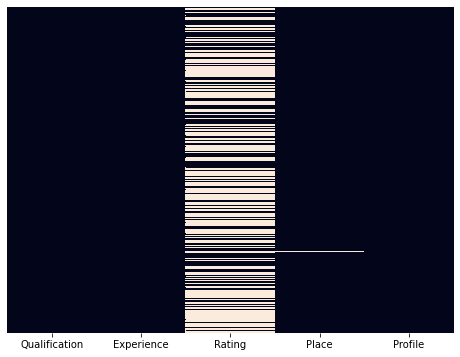

In [113]:
# null value seeing in heat map
plt.figure(figsize=(8,6))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [114]:
for column in test_df.columns:
    if test_df[column].dtypes==object:
        print(str(column)+':'+str(test_df[column].unique()))
        print(test_df[column].value_counts())
        print('********************************************************************')
        print('\n')

Qualification:['MBBS' 'MBBS, Diploma in Otorhinolaryngology (DLO)' 'MBBS, DDVL' 'BAMS'
 'BDS, MDS - Conservative Dentistry & Endodontics' 'BDS, MDS'
 'BDS, MDS - Pedodontics'
 'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA'
 'BHMS' 'BDS' 'MBBS, FCD - Diabetology' 'MBBS, DDV'
 'MBBS, MD - Dermatology' 'MS - ENT'
 'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)'
 'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology'
 'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)'
 'BDS, MDS - Periodontics' 'BDS, MDS- Oral Pathology'
 'MBBS, MD - General Medicine' 'MS - ENT, MBBS'
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT'
 'MBBS, MS - ENT, DNB - Otorhinolaryngology'
 'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics'
 'BSc, LCEH' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, DGO, MD - Obstetrics & Gynaecology' 'BHMS, MD - Hom

In [115]:
split_Title=test_df['Qualification'].str.split(',',n=1,expand=True)
split_Title.rename(columns={0:'Qual1',1:'Qual2'})

,Qual1,Qual2
0,MBBS,None
1,MBBS,Diploma in Otorhinolaryngology (DLO)
2,MBBS,DDVL
3,BAMS,None
4,BDS,MDS - Conservative Dentistry & Endodontics
...,...,...
1982,BAMS,Doctor of Medicine
1983,MD - Dermatology,"Venereology & Leprosy, MBBS"
1984,MBBS,MD / MS - Obstetrics & Gynaecology
1985,BDS,None


In [116]:
test_df[['Qual1','Qual2']]=test_df['Qualification'].str.split(',',n=1,expand=True)
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Qual1,Qual2
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,MBBS,None
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO)
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,MBBS,DDVL
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,BAMS,None
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,BDS,MDS - Conservative Dentistry & Endodontics


In [117]:
split_Title=test_df['Place'].str.split(',',n=1,expand=True)
split_Title.rename(columns={0:'Street',1:'City'})

,Street,City
0,Ghatkopar East,Mumbai
1,West Marredpally,Hyderabad
2,KK Nagar,Chennai
3,New Ashok Nagar,Delhi
4,Kanakpura Road,Bangalore
...,...,...
1982,Basavanagudi,Bangalore
1983,Choolai,Chennai
1984,Porur,Chennai
1985,Arekere,Bangalore


In [118]:
test_df[['Street','City']]=test_df['Place'].str.split(',',n=1,expand=True)
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Qual1,Qual2,Street,City
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,MBBS,None,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),West Marredpally,Hyderabad
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,MBBS,DDVL,KK Nagar,Chennai
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,BAMS,None,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,BDS,MDS - Conservative Dentistry & Endodontics,Kanakpura Road,Bangalore


In [119]:
test_df.drop('Qualification',axis=1,inplace=True)

In [120]:
test_df.drop('Place',axis=1,inplace=True)

In [121]:
test_df.head()

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,35 years experience,NaN,General Medicine,MBBS,None,Ghatkopar East,Mumbai
1,31 years experience,NaN,ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),West Marredpally,Hyderabad
2,40 years experience,70%,Dermatologists,MBBS,DDVL,KK Nagar,Chennai
3,0 years experience,NaN,Ayurveda,BAMS,None,New Ashok Nagar,Delhi
4,16 years experience,100%,Dentist,BDS,MDS - Conservative Dentistry & Endodontics,Kanakpura Road,Bangalore


In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
le=LabelEncoder()
test_df['Experience']=le.fit_transform(test_df['Experience'])

In [124]:
le=LabelEncoder()
test_df['Profile']=le.fit_transform(test_df['Profile'])

In [125]:
le=LabelEncoder()
test_df['Qual1']=le.fit_transform(test_df['Qual1'])

In [126]:
test_df['Qual2']=test_df['Qual2'].astype(str)

In [127]:
le=LabelEncoder()
test_df['Qual2']=le.fit_transform(test_df['Qual2'])

In [128]:
test_df['Street']=test_df['Street'].astype(str)

In [129]:
le=LabelEncoder()
test_df['Street']=le.fit_transform(test_df['Street'])

In [130]:
test_df['City']=test_df['City'].astype(str)

In [131]:
le=LabelEncoder()
test_df['City']=le.fit_transform(test_df['City'])

In [132]:
test_df.head()

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,28,NaN,4,48,535,142,6
1,24,NaN,3,48,167,577,5
2,34,70%,2,48,58,212,1
3,0,NaN,0,1,535,373,3
4,7,100%,1,2,371,231,0


In [134]:
test_df=test_df.replace(['%'],[''],regex=True)

In [135]:
test_df

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,28,NaN,4,48,535,142,6
1,24,NaN,3,48,167,577,5
2,34,70,2,48,58,212,1
3,0,NaN,0,1,535,373,3
4,7,100,1,2,371,231,0
...,...,...,...,...,...,...,...
1982,1,NaN,0,1,189,58,0
1983,33,NaN,2,52,532,96,1
1984,56,NaN,4,48,367,423,1
1985,3,98,1,2,535,26,0


In [137]:
test_df['Rating'].unique()

array([nan, '70', '100', '90', '94', '99', '98', '87', '64', '96', '95',
       '97', '93', '69', '71', '83', '92', '80', '86', '88', '67', '85',
       '84', '55', '89', '82', '81', '60', '73', '65', '77', '91', '78',
       '79', '76', '52', '53'], dtype=object)

In [138]:
test_df['Rating']=test_df['Rating'].replace(np.nan,0)

In [139]:
test_df['Rating'].unique()

array([0, '70', '100', '90', '94', '99', '98', '87', '64', '96', '95',
       '97', '93', '69', '71', '83', '92', '80', '86', '88', '67', '85',
       '84', '55', '89', '82', '81', '60', '73', '65', '77', '91', '78',
       '79', '76', '52', '53'], dtype=object)

In [141]:
test_df['Rating']=test_df['Rating'].astype(int)

In [142]:
test_df['Rating']=test_df['Rating'].replace(0, np.NaN)

In [144]:
test_df['Rating']=test_df['Rating'].fillna(test_df['Rating'].mean())

In [146]:
test_df

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,28,94.441472,4,48,535,142,6
1,24,94.441472,3,48,167,577,5
2,34,70.000000,2,48,58,212,1
3,0,94.441472,0,1,535,373,3
4,7,100.000000,1,2,371,231,0
...,...,...,...,...,...,...,...
1982,1,94.441472,0,1,189,58,0
1983,33,94.441472,2,52,532,96,1
1984,56,94.441472,4,48,367,423,1
1985,3,98.000000,1,2,535,26,0


In [148]:
test_df.isnull().values.any()

False

Now There are no Null Value Present

# Summary Statistics

In [149]:
test_df.describe()

,Experience,Rating,Profile,Qual1,Qual2,Street,City
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,21.884248,94.441472,2.508807,29.154001,351.622043,289.932058,3.037745
std,18.772896,5.089688,1.654223,24.729848,171.357740,173.578372,2.277143
min,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,94.441472,1.000000,2.000000,234.000000,138.500000,1.000000
50%,15.000000,94.441472,2.000000,48.000000,377.000000,294.000000,3.000000
75%,35.000000,96.000000,4.000000,48.000000,535.000000,440.000000,5.000000
max,56.000000,100.000000,5.000000,86.000000,535.000000,589.000000,8.000000


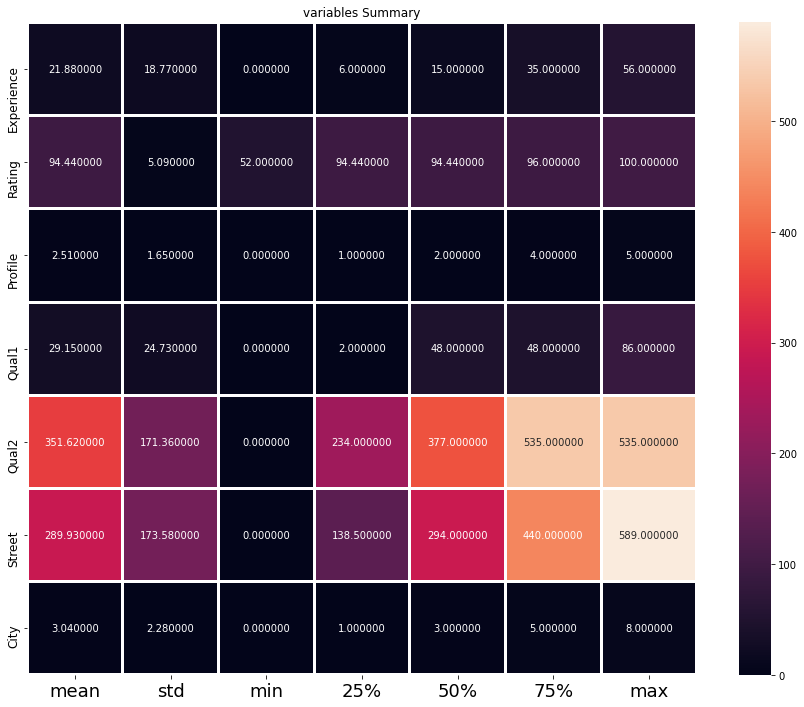

In [150]:
plt.figure(figsize=(15,12))
sns.heatmap(round(test_df.describe()[1:].transpose(),2), linewidth=2, annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables Summary")
plt.show()

# Checking the Outliers and Skewness


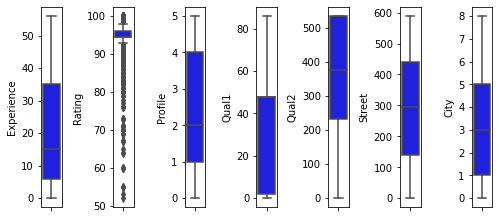

In [151]:
collist=test_df.columns.values
ncol=20
nrows=20
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(test_df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

Only One Column  Rating is showing Outliers

In [152]:
test_df.skew()

Experience    0.687595
Rating       -3.808731
Profile       0.028926
Qual1         0.013098
Qual2        -0.490571
Street        0.038172
City          0.007716
dtype: float64

Only one column is showing  Negative Skewness .
Rating =  -3.808731


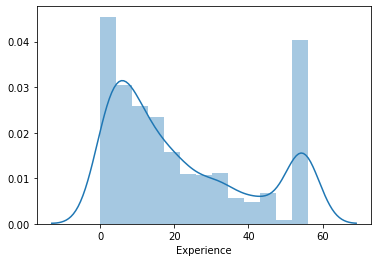

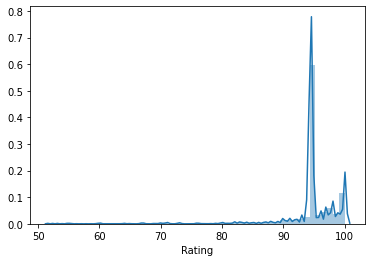

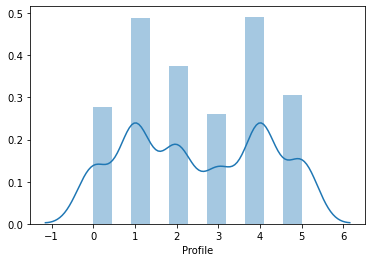

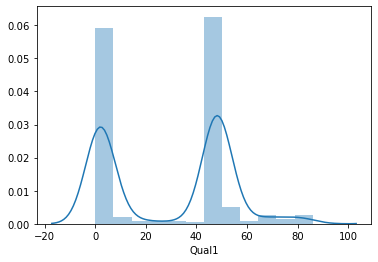

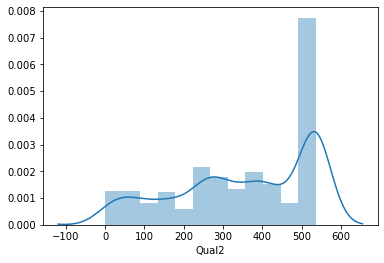

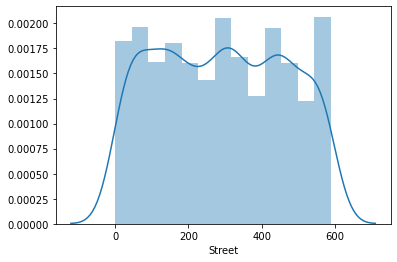

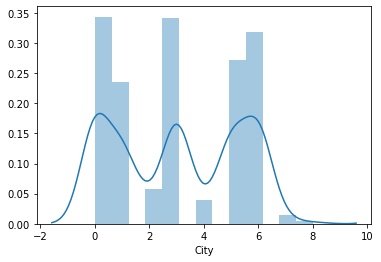

In [153]:
for i in test_df.columns:
    sns.distplot(test_df[i])
    plt.show()

In [154]:
# Remove Outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(test_df))
threshold=3
print(np.where(z>3))

(array([   2,   17,   65,   72,  168,  214,  362,  436,  449,  454,  564,
        622,  652,  671,  773,  964,  976,  992,  996, 1001, 1061, 1094,
       1099, 1121, 1201, 1233, 1288, 1294, 1394, 1405, 1425, 1451, 1530,
       1640, 1657, 1724, 1776, 1790, 1825, 1830, 1856, 1875, 1958],
      dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64))


In [155]:
test_df_new=test_df[(z<3).all(axis=1)]

In [156]:
test_df_new

,Experience,Rating,Profile,Qual1,Qual2,Street,City
0,28,94.441472,4,48,535,142,6
1,24,94.441472,3,48,167,577,5
3,0,94.441472,0,1,535,373,3
4,7,100.000000,1,2,371,231,0
5,5,90.000000,1,2,370,552,1
...,...,...,...,...,...,...,...
1982,1,94.441472,0,1,189,58,0
1983,33,94.441472,2,52,532,96,1
1984,56,94.441472,4,48,367,423,1
1985,3,98.000000,1,2,535,26,0


In [157]:
test_df.shape

(1987, 7)

In [158]:
#Percentage loss of Data after removing outliers
percentage_loss=((1987-1944)/1987)*100
print(percentage_loss)

2.1640664318067437


In [159]:
# Load the Model
import pickle
fitted_model=pickle.load(open("Project_13_Doctor_Fees.pkl","rb"))

In [160]:
fitted_model

RandomForestRegressor(criterion='friedman_mse', n_estimators=300)

In [162]:
#prediction over test data

predictions = fitted_model.predict(test_df)

In [163]:
predictions

array([542.73333333, 542.73333333, 556.        , ..., 556.        ,
       552.83333333, 556.        ])